In [1]:
import pandas as pd

df = pd.read_csv('Salary Data.csv')

In [2]:
display(df.head())
display(df.describe())
display(df.info())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


None

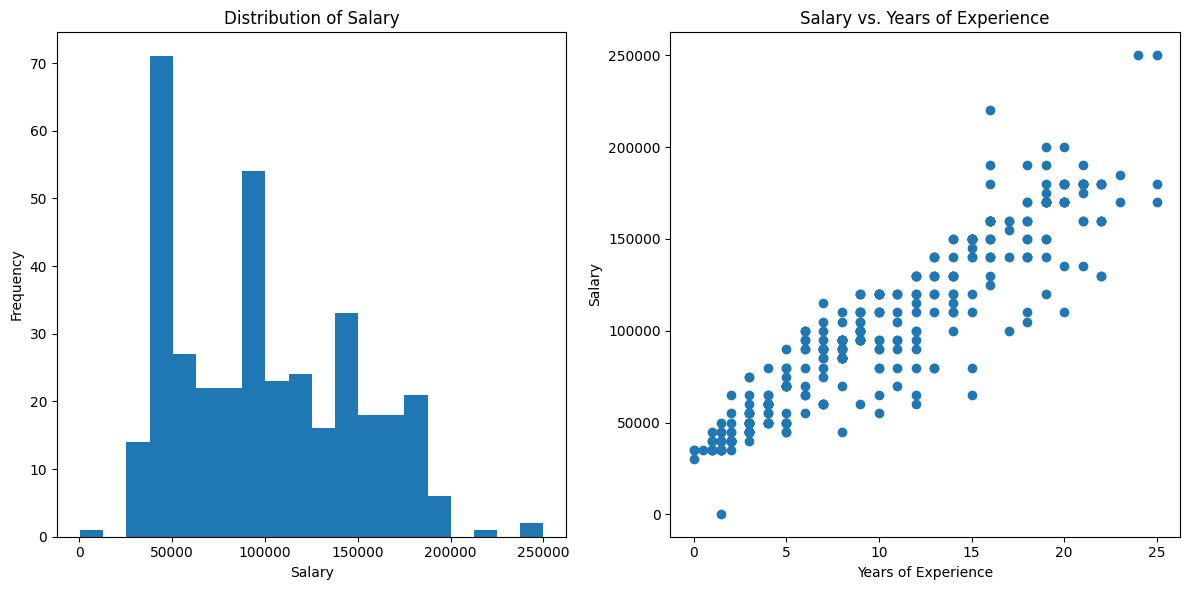

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')

plt.subplot(1, 2, 2)
plt.scatter(df['Years of Experience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')

plt.tight_layout()
plt.show()

In [4]:
df_cleaned = df.dropna()

X = df_cleaned['Years of Experience'].values.reshape(-1, 1)
y = df_cleaned['Salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


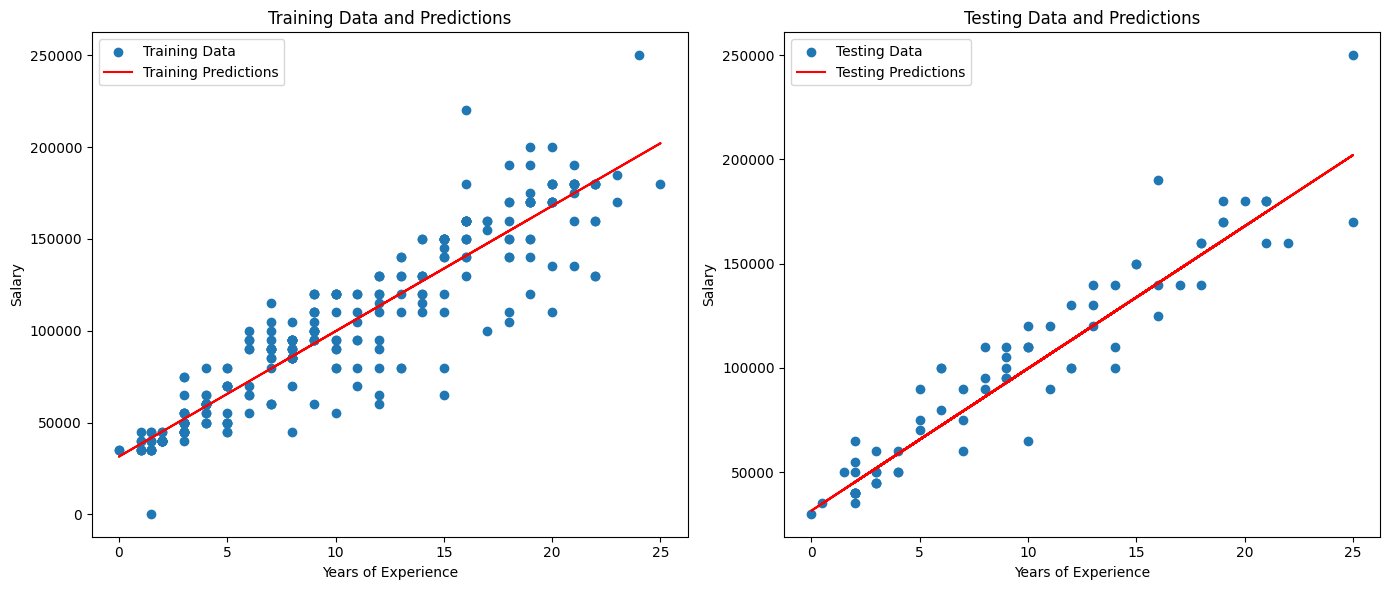

In [6]:
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, y_train_pred, color='red', label='Training Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Training Data and Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Testing Data')
plt.plot(X_test, y_test_pred, color='red', label='Testing Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Testing Data and Predictions')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

print(f'Training R-squared: {model.score(X_train, y_train):.2f}')
print(f'Testing R-squared: {model.score(X_test, y_test):.2f}')

Coefficient: 6822.590174988686
Intercept: 31521.077620206008
Training R-squared: 0.86
Testing R-squared: 0.90
